In [1]:
# 本节内容主要是比较几个优化器的效果

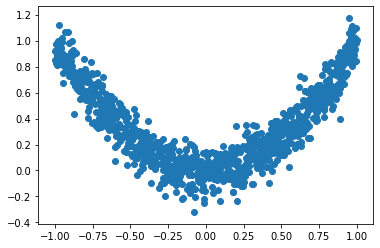

In [6]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# 构建数据
x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [7]:
# dataloader
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(dataset=torch_dataset,
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        num_workers=2)

In [14]:
# 每个优化器优化一个神经网络
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
    
    def forward(self,x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [15]:
# 为每个优化器创建一个net
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD,net_Momentum,net_RMSprop,net_Adam]

In [16]:
# 优化器optimizer
opt_SGD = torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # 记录 training 时不同神经网络的 loss

EPOCH:  0
EPOCH:  1
EPOCH:  2
EPOCH:  3
EPOCH:  4
EPOCH:  5
EPOCH:  6
EPOCH:  7
EPOCH:  8
EPOCH:  9
EPOCH:  10
EPOCH:  11


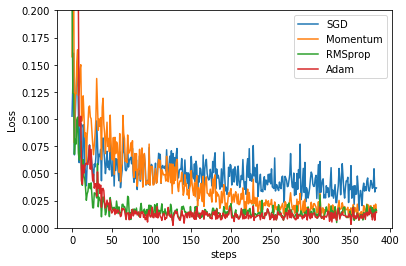

In [17]:
# 训练出图
for epoch in range(EPOCH):
    print('EPOCH: ',epoch)
    for step,(b_x,b_y) in enumerate(loader):
        
        # 对每个优化器，优化属于他的神经网络
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            output = net(b_x)
            loss = loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data.numpy())
            
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i,l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i])

plt.legend(loc='best')
plt.xlabel('steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()